In [59]:
import numpy as np

In [90]:
x = np.array([[18],[23],[28],[33],[38],[43],[48],[53],[58],[63]])
y = np.array([[871],[1132],[1042],[1356],[1480],[1638],[1569],[1754],[1866],[1900]])

In [91]:
x

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [92]:
y

array([[ 871],
       [1132],
       [1042],
       [1356],
       [1480],
       [1638],
       [1569],
       [1754],
       [1866],
       [1900]])

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler_x = StandardScaler()
X = scaler_x.fit_transform(x)

In [95]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [96]:
scaler_y = StandardScaler()
Y = scaler_y.fit_transform(y)

In [97]:
Y

array([[-1.75542276],
       [-0.97860801],
       [-1.24647516],
       [-0.31191642],
       [ 0.05714499],
       [ 0.52740067],
       [ 0.32203585],
       [ 0.87265167],
       [ 1.20599746],
       [ 1.30719172]])

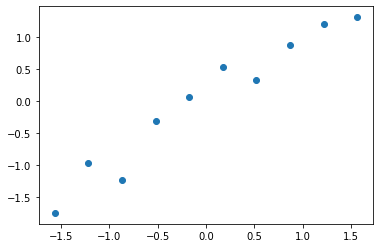

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X,Y)

In [99]:
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [100]:
import tensorflow as tf

In [101]:
b0 = tf.Variable(0.54)
b1 = tf.Variable(0.71)

In [102]:
erro = tf.losses.mean_squared_error(Y, (b0 + b1 * X))
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
trainamento = otimizador.minimize(erro)
init = tf.global_variables_initializer()

In [103]:
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(b0))
    print(sess.run(b1))
    for i in range(1000):
        sess.run(trainamento)
    b0_final,b1_final = sess.run([b0,b1])

0.54
0.71


In [104]:
b0_final

0.07293497

In [105]:
b1_final

0.9364077

In [106]:
previsoes = b0_final + b1_final * X

In [107]:
previsoes

array([[-1.39413392],
       [-1.06811861],
       [-0.7421033 ],
       [-0.41608799],
       [-0.09007268],
       [ 0.23594263],
       [ 0.56195793],
       [ 0.88797324],
       [ 1.21398855],
       [ 1.54000386]])

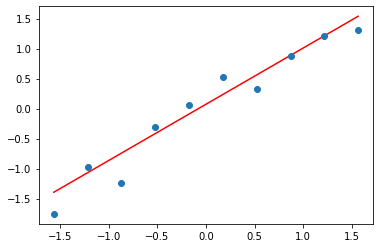

In [108]:
plt.plot(X,previsoes,color ='red')
plt.plot(X,Y,'o')

In [109]:
scaler_x.transform([[40]])

array([[-0.03481553]])

In [110]:
previsao = scaler_y.inverse_transform(b0_final + b1_final * scaler_x.transform([[14]]))
previsao

array([[904.75887214]])

In [111]:
y1 = scaler_y.inverse_transform(Y)
y1

array([[ 871.],
       [1132.],
       [1042.],
       [1356.],
       [1480.],
       [1638.],
       [1569.],
       [1754.],
       [1866.],
       [1900.]])

In [112]:
previsoes1 = scaler_y.inverse_transform(previsoes)
previsoes1

array([[ 992.38851166],
       [1101.92556106],
       [1211.46261046],
       [1320.99965986],
       [1430.53670926],
       [1540.07375866],
       [1649.61080806],
       [1759.14785746],
       [1868.68490686],
       [1978.22195626]])

In [113]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y1,previsoes1)
mse = mean_squared_error(y1,previsoes1)

In [114]:
mae

66.99809619301519

In [115]:
mse

7026.889464706112